# Welcome to Deep Learning

using sklearn build basic perceptron on iris

In [ ]:
from sklearn.linear_model import Perceptron
import numpy as np
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
X = iris.data[:,(2,3)]

In [ ]:
y = (iris.target == 0).astype(np.int)

In [ ]:
perceptron = Perceptron()

In [ ]:
perceptron.fit(X,y)

In [ ]:
y_pred = perceptron.predict([[2,0.5]])

In [ ]:
y_pred

Perceptron = SGDClassifier(loss = 'perceptron', learning_rate = 'constant', eta0 = 1, penalty = None)

### MLP or Multi-Layer Perceptron


Stacking more perceptron one over the other

input layer - hidden layer - output layer

### ANN + stack of hidden layers = Deep Neural Network

In 1986, Geoffrey Hinton et al invented backpropagation for training neural networks

<a>Automatic computing gradients is called automatic differentiation or autodiff

Backpropagation Steps:<br>
1. Make prediction with one forward pass with randomly initialized weights
2. Measure the error with reverse pass
3. Update weights to reduce errors
4. Repeat for other instances

### Activation Functions: used at the core of a node in deep neural network

They map input to a non linear output

1. Sigmoid (0 to 1)
2. Tanh (-1 to 1)
3. ReLU (0 to z)

For classification purpose, do not use any activation function for output neuron

### General Structure of DNN

input nodes = 1 per input<br>
hidden layers = 1 to 5<br>
hidden units per layer = 10 to 100<br>
output units = 1 per dimension<br>
activation = ReLU or SeLU<br>
Loss function = MSE or MAE/Huber(if outliers)

<b>For Multiclass classification, use 1 output unit per class and take softmax

<b>For Multi label binary classification, use 1 output unit per label

<b>Loss function for classification problems is Cross-Entropy

# Keras

### Developed by Francis Chollet, released as open source in March 2015

Thank you sir for your contribution, it is going to earn me a living

keras uses theano/mxnet/tensorflow backends

# Using keras to build first neural network

## An image classifier on fashion mnist

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Dataset collection and preprocessing

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [5]:
# creating validation sets and scaling
X_valid = X_train[:5000]/255
X_train = X_train[5000:]/255
y_valid = y_train[:5000]
y_train = y_train[5000:]

### Model building

In [6]:
model = keras.models.Sequential()

In [7]:
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(units=300,activation='relu'))
model.add(keras.layers.Dense(units=100,activation='relu'))
model.add(keras.layers.Dense(units=10,activation='softmax'))

### Layers 

1. <b>Flatten</b> - reshapes the 2d array into 1d array (-1,1) (vertical)<br>
Does not have any parameters except input shape<br>
Alternative - keras.layers.InputLayer

2. <b>Dense</b> - hidden layer with 300 neurons & ReLU activation<br>

3. <b>Dense</b> - hidden layer with 100 neurons & ReLU activation<br>

4. <b>Dense</b> - final output layer with 10 neurons & softmax activation<br>

### Check model summary

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Check layers

In [9]:
model.layers

### Compile the model

In [10]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

### Fit the model to train

In [11]:
history = model.fit(X_train, y_train, epochs=50,
                   validation_data=(X_valid,y_valid))

Epoch 1/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7217 - accuracy: 0.7611 - val_loss: 0.5443 - val_accuracy: 0.8172
Epoch 2/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4910 - accuracy: 0.8282 - val_loss: 0.4480 - val_accuracy: 0.8476
Epoch 3/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4475 - accuracy: 0.8432 - val_loss: 0.4780 - val_accuracy: 0.8298
Epoch 4/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4211 - accuracy: 0.8514 - val_loss: 0.4026 - val_accuracy: 0.8634
Epoch 5/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3998 - accuracy: 0.8593 - val_loss: 0.3885 - val_accuracy: 0.8644
Epoch 6/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3853 - accuracy: 0.8633 - val_loss: 0.3694 - val_accuracy: 0.8716
Epoch 7/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3692 - accuracy: 0.8692 - val_loss: 0.3805 - val_accuracy:

### Visualize Learning curves

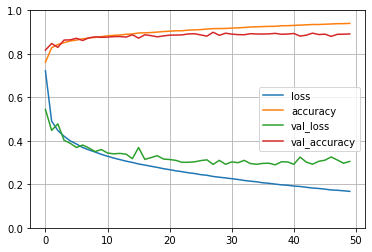

In [12]:
pd.DataFrame(history.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

### Save Model

In [14]:
model.save('my_model_A')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_model_A\assets


### Evaluate model

returns loss, accuracy

In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 81.1378 - accuracy: 0.8365


[81.1378402709961, 0.8364999890327454]

### Predictions

In [59]:
X_new = X_test[3]

In [60]:
X_new.shape

(28, 28)

In [64]:
X_new = X_new.reshape(1,28,28)

In [65]:
X_new.shape

(1, 28, 28)

In [66]:
y_proba = model.predict(np.array(X_new))

In [67]:
y_proba.round(2)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [69]:
np.argmax(model.predict(X_new))

1

## Regression MLP on CA housing

one output unit with MSE as loss function

In [112]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [113]:
housing = fetch_california_housing()

In [114]:
X_train, X_test, y_train, y_test = train_test_split(housing.data,housing.target)

In [115]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

In [116]:
X_train.shape[1:]

(8,)

### Feature Scaling

In [117]:
scaler = StandardScaler()

In [118]:
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [127]:
model = keras.models.Sequential([
    keras.layers.Dense(units=30,activation='relu',input_shape=(8,)),
    keras.layers.Dense(units=1)
])

In [128]:
model.compile(loss='mean_squared_error',optimizer='sgd')

In [129]:
history = model.fit(X_train_scaled,y_train, epochs=20,
                   validation_data=(X_valid_scaled,y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7750 - val_loss: 1.0146
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 2.3144 - val_loss: 2.8362
Epoch 3/20
363/363 [==============================] - 0s 976us/step - loss: 2.9549 - val_loss: 1.1161
Epoch 4/20
363/363 [==============================] - 0s 966us/step - loss: 0.4723 - val_loss: 0.5462
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4319 - val_loss: 0.5543
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4211 - val_loss: 0.6061
Epoch 7/20
363/363 [==============================] - 0s 967us/step - loss: 0.4001 - val_loss: 0.4580
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3913 - val_loss: 0.4968
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3844 - val_loss: 0.5188
Epoch 10/20
363/363 [==============================] - 0s 983us/step - loss: 0.3760 - val_loss

(0.0, 1.0)

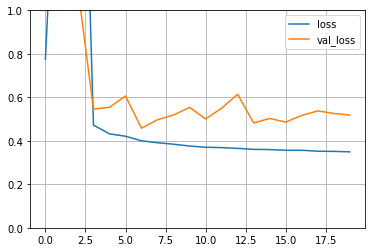

In [130]:
pd.DataFrame(history.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)

Follow some other tutorial this is dumb example, accuracy does not increase, does not work